In [452]:
import numpy as np
import matplotlib.pyplot as plt
from crtbp_prop import propNRevsPlanes
from lagrange_pts import lagrange_pts
import copy
from IPython.display import clear_output
%matplotlib inline

In [189]:
# Постоянные
Sm = 1.98847e30  #Масса Солнца
Em = 5.9722e24  # Масса Земли
ER = 1.496e8  # Расстояние между Землей и Солнцем
T = 365*24*60*60  # Период обращения Земли вокруг Солнца

# Безразмерная система
mu1 = Sm/(Sm + Em)  # масса Солнца
v0kms = 0.1
vcoef = T/(2*np.pi*ER) # Коэффициент скорости
earth = np.array([mu1,0,0]) # Координаты Земли
sun = np.array([mu1-1.,0,0,])
L = lagrange_pts(mu1) # Координаты точек Либрации
L1 = L[0,0]

In [158]:
step_x(coords_xs,0,step,1)
step_z(coords_xs,step,1)
step_x(coords_xs,1,step,1)

In [159]:
coords_xs

[[[0.9900935214992046, 0.0], [0.9901603664189907, 0.0]],
 [[0.9900935214992046, 6.684491978609626e-05],
  [0.9901603664189907, 6.684491978609626e-05]]]

In [161]:
coords_xs[1]

[[0.9900935214992046, 6.684491978609626e-05],
 [0.9901603664189907, 6.684491978609626e-05]]

In [166]:
earth[0]-1

-3.0034056652805674e-06

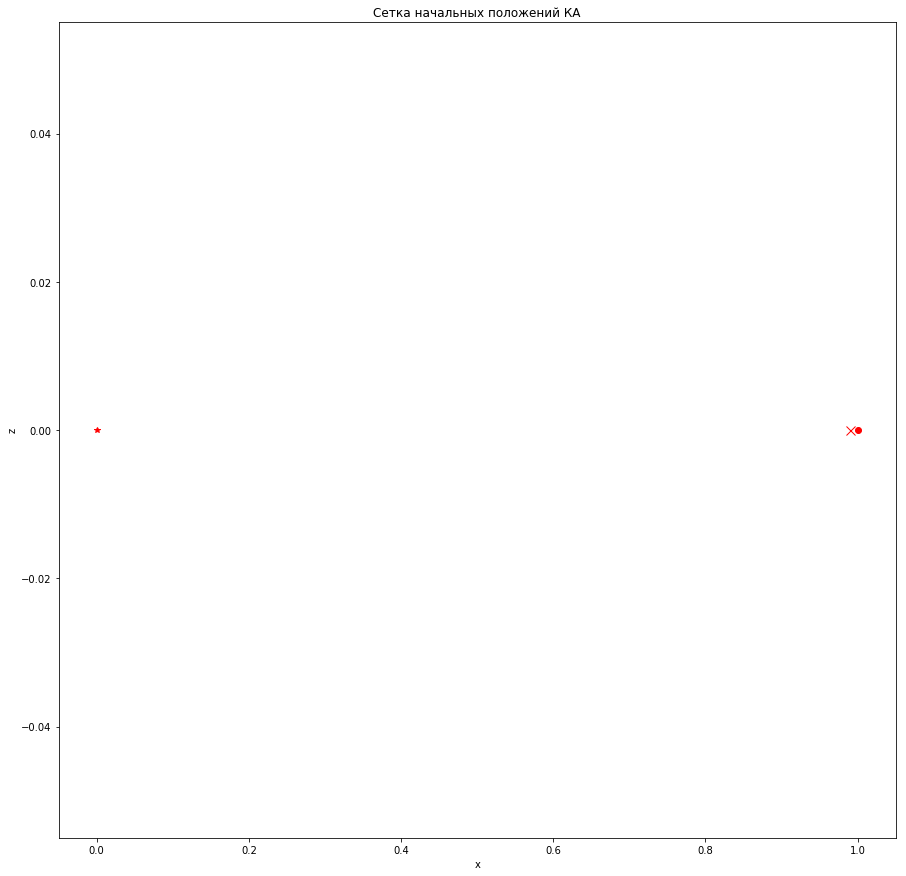

In [168]:
plt.figure(figsize=(15,15))
plt.plot(earth[0],earth[2],'ro')
plt.plot(sun[0],sun[2],'r*')
plt.plot(L[0,0],L[0,2],'rx',markersize=9)
#plt.plot(coords[0][:,0],coords[0][:,1],'b.')
# for row in coords_xs:
#     points = np.array(row)
#     plt.plot(points[:,0],points[:,1],'b.')
plt.xlabel('x')
plt.ylabel('z')
plt.title('Сетка начальных положений КА');
#plt.ylim()

In [508]:
step = 1e4/ER

In [509]:
L1 = L[0,0]
xl_def = L1 - 1e6/ER
xr_def = L1 + 1e6/ER

In [510]:
kcoef = 1.2
bp11 = [L1-step,0.0]
bp12 = [L1-2*step,0.0]

temp11 = propNRevsPlanes(mu1,s0(*bp11,v0kms),0,[xl_def,xr_def,1])
temp12 = propNRevsPlanes(mu1,s0(*bp12,v0kms),0,[xl_def,xr_def,1])

planes1max = [temp11[:,0].max()+kcoef*step,temp12[:,0].max()+kcoef*step]
planes1min = [temp11[:,0].min()-kcoef*step,temp12[:,0].min()-kcoef*step]

In [511]:
type(propNRevsPlanes(mu1,s0(*bp11,v0kms),0,[planes1min[0],planes1max[0],1]))

numpy.ndarray

In [512]:
type(propNRevsPlanes(mu1,s0(*bp12,v0kms),0,[planes1min[1],planes1max[1],1]))

numpy.ndarray

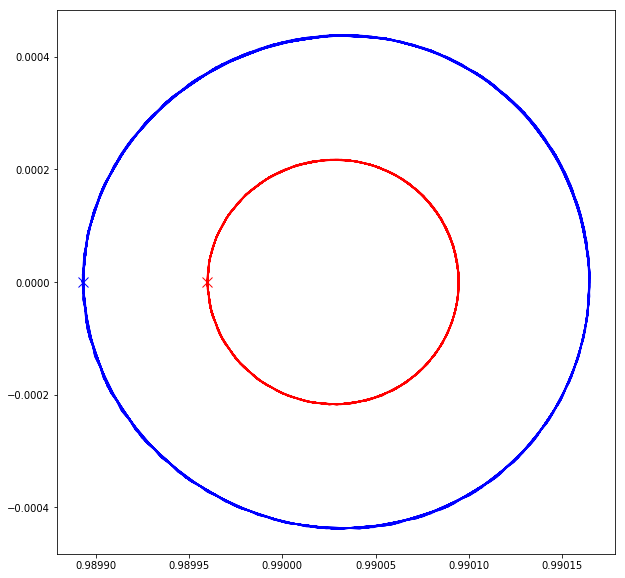

In [513]:
plt.figure(figsize=(10,10))
plt.plot(temp11[:,0],temp11[:,1],'r')
plt.plot(bp11[0],0,'rx',markersize=10)
plt.plot(temp12[:,0],temp12[:,1],'b')
plt.plot(bp12[0],0,'bx',markersize=10)

In [514]:
def s0(x,z,v):
     return np.array([x, 0., z, 0, v*vcoef, 0])

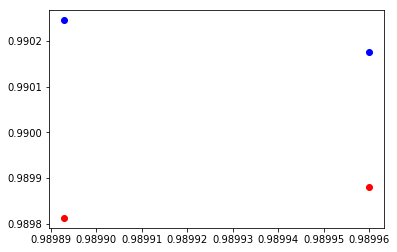

In [515]:
plt.plot([bp11[0],bp12[0]],planes1max,'ob')
plt.plot([bp11[0],bp12[0]],planes1min,'or')

In [516]:
def line(p1,p2,x):
    return p1[1]+(p2[1]-p1[1])*((x-p1[0])/(p2[0]-p1[0]))

In [570]:
kcoef = 1.2
flag = 1
i=0
planes1max = [temp11[:,0].max()+kcoef*step,temp12[:,0].max()+kcoef*step]
planes1min = [temp11[:,0].min()-kcoef*step,temp12[:,0].min()-kcoef*step]
xs1 = [L1-step,L1-2*step]
while flag:
    p1 = [xs1[-1],planes1max[-1]]
    p2 = [xs1[-2],planes1max[-2]]
    p3 = [xs1[-1],planes1min[-1]]
    p4 = [xs1[-2],planes1min[-2]]
    xs1.append(xs1[-1]-step)
    planes1max.append(line(p1,p2,xs1[-1]))
    planes1min.append(line(p3,p4,xs1[-1]))
    out = propNRevsPlanes(mu=mu1,s0 = s0(xs1[-1],0.0,v0kms),beta=0.,planes=[planes1min[-1],planes1max[-1],1],N=20)
    i+=1
    print(i)
    if type(out) == dict:
        flag = 0

1
2
3
4
5
6
7
8


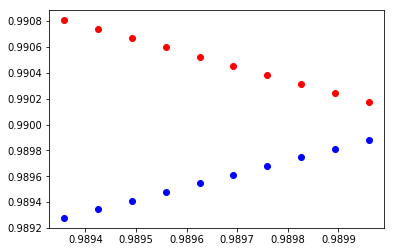

In [571]:
plt.plot(xs1,planes1max,'or')
plt.plot(xs1,planes1min,'ob')

In [572]:
kcoef = 1.2
flag = 1
i=0
planes1max = [temp11[:,0].max()+kcoef*step]
planes1min = [temp11[:,0].min()-kcoef*step]
xs1 = [L1-step]
while flag:
    xs1.append(xs1[-1]-step)
    planes1max.append(planes1max[-1]+kcoef*step)
    planes1min.append(planes1min[-1]-kcoef*step)
    out = propNRevsPlanes(mu=mu1,s0 = s0(xs1[-1],0.0,v0kms),beta=0.,planes=[planes1min[-1],planes1max[-1],1],N=20)
    i+=1
    print(i)
    if type(out) == dict:
        flag = 0

1
2
3
4
5
6
7
8
9
10
11
12
13


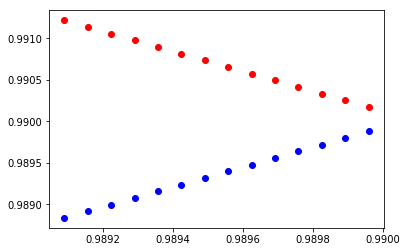

In [573]:
plt.plot(xs1,planes1max,'or')
plt.plot(xs1,planes1min,'ob')

In [574]:
kcoef = 2
flag = 1
i=0
planes1max = [temp11[:,0].max()+kcoef*step]
planes1min = [temp11[:,0].min()-kcoef*step]
xs1 = [L1-step]
while flag:
    xs1.append(xs1[-1]-step)
    planes1max.append(planes1max[-1]+kcoef*step)
    planes1min.append(planes1min[-1]-kcoef*step)
    out = propNRevsPlanes(mu=mu1,s0 = s0(xs1[-1],0.0,v0kms),beta=0.,planes=[planes1min[-1],planes1max[-1],1],N=20)
    i+=1
    print(i)
    if type(out) == dict:
        flag = 0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


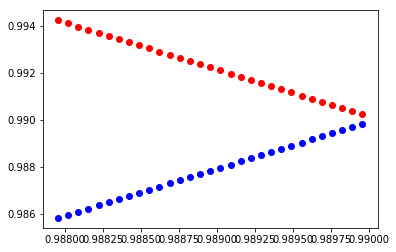

In [575]:
plt.plot(xs1,planes1max,'or')
plt.plot(xs1,planes1min,'ob')

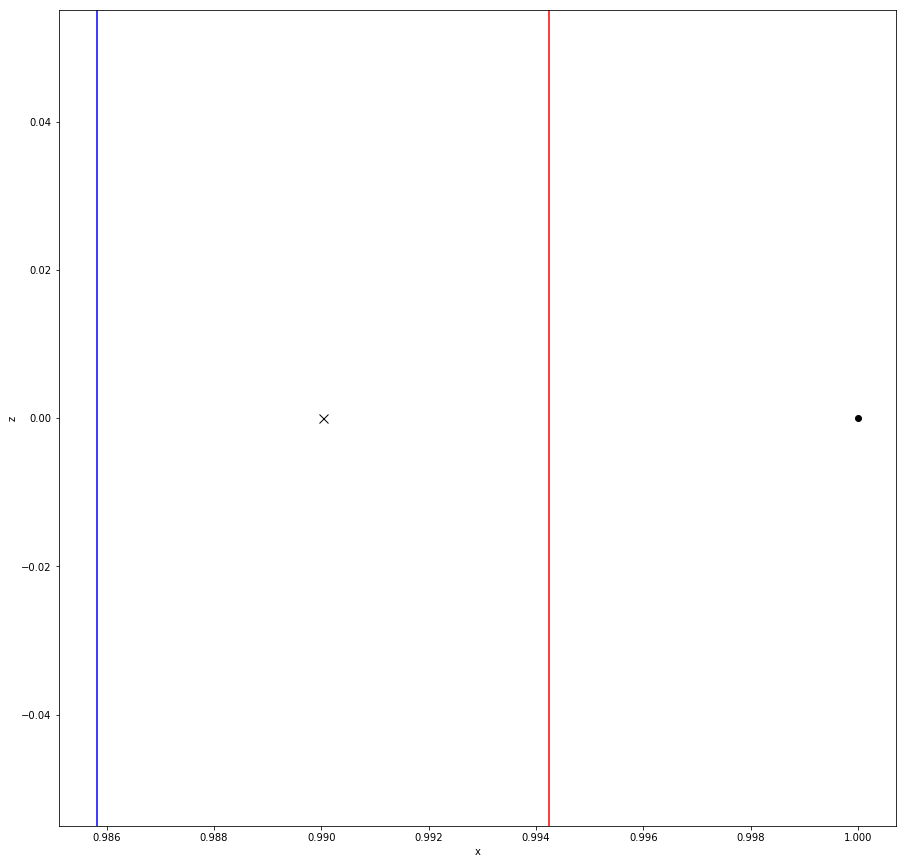

In [578]:
plt.figure(figsize=(15,15))
plt.plot(earth[0],earth[2],'ko')
#plt.plot(sun[0],sun[2],'r*')
plt.plot(L[0,0],L[0,2],'kx',markersize=9)
plt.axvline(planes1max[-1],c='r')
plt.axvline(planes1min[-1],c='b')
plt.xlabel('x')
plt.ylabel('z');

In [580]:
xl_def = L1 -(earth[0]-L1)
xr_def = earth[0]-1e4/ER
planes = [xl_def,xr_def,1]

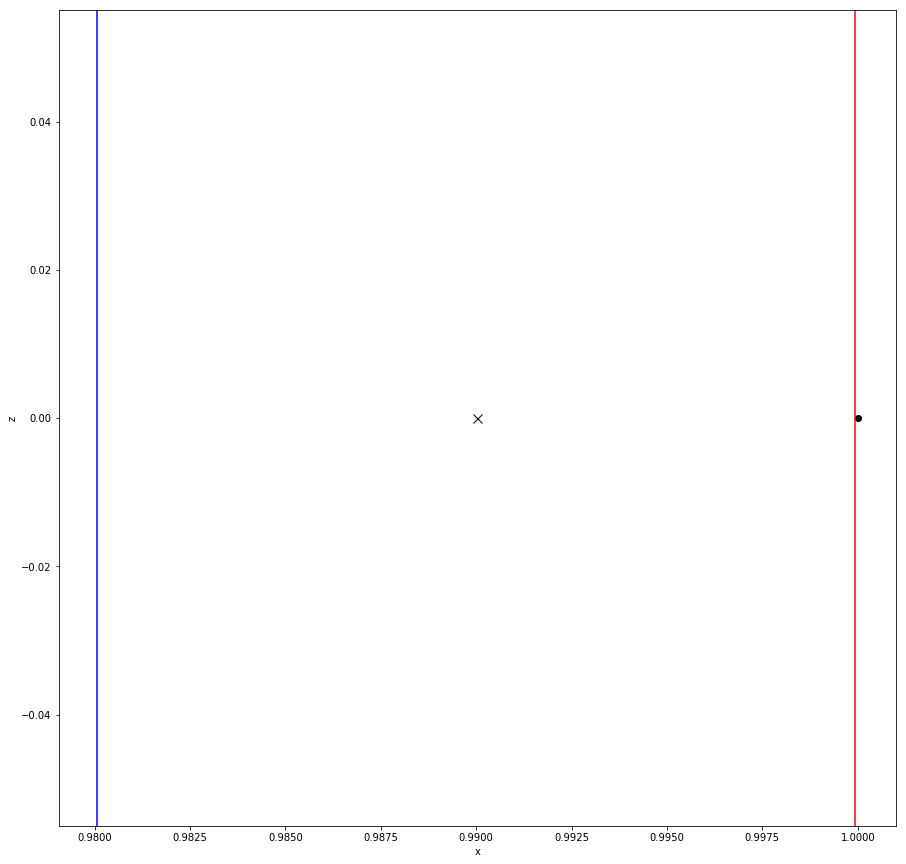

In [581]:
plt.figure(figsize=(15,15))
plt.plot(earth[0],earth[2],'ko')
#plt.plot(sun[0],sun[2],'r*')
plt.plot(L[0,0],L[0,2],'kx',markersize=9)
#plt.plot(xr_def,0,'r|',markersize=10)
#plt.plot(xl_def,0,'b|',markersize=10)
plt.axvline(xr_def,c='r')
plt.axvline(xl_def,c='b')
plt.xlabel('x')
plt.ylabel('z');

In [621]:
def PropLineGreedy(L,start,step,level,planes):
    stp = np.arange(start,L-100*step,-step)
    stp = np.array(list(zip(stp,np.full_like(stp,level))))
    arr = []
    xl = []
    xr = []
    for i, p in enumerate(stp):
        print(i)
        clear_output(wait=True)
        out = propNRevsPlanes(mu1,s0(*p,v0kms),0,planes,20)
        if type(out)!=dict:
            arr.append(out)
            xl.append(arr[-1][:,0].min())
            xr.append(arr[-1][:,0].max())
        else:
            break
    return stp, arr, xl ,xr

In [619]:
xl_def = L1 -(earth[0]-L1)
xr_def = earth[0]-1e4/ER
planes = [xl_def,xr_def,1]

In [620]:
stp1, arr1, xl1, xr1 = PropLineGreedy(L1,L1-step,step,0.0,planes)

59


In [622]:
stp2, arr2, xl2, xr2 = PropLineGreedy(L1,L1-step,step,20*step,planes)

58


In [623]:
stp3, arr3, xl3, xr3 = PropLineGreedy(L1,L1-step,step,100*step,planes)

34


In [529]:
def ShowLimDep(stp,xl,xr):
    k = len(xl)
    plt.figure(figsize=(10,10))
    plt.plot(stp[:k,0],xr,'ro')
    plt.plot(stp[:k,0],xl,'bo')
    plt.legend(('Max','Min'))

In [564]:
def ShowTraj(arr,traj_span, bound = None):
    plt.figure(figsize=(15,15))
    for i in range(*traj_span): 
        plt.plot(arr[i][:,0],arr[i][:,1])
    plt.legend(np.arange(*traj_span))
    plt.plot(L[0,0],L[0,2],'kx',markersize=9)
    plt.plot(earth[0],earth[2],'ko')
    if bound:
        plt.axvline(bound[1],c='k')
        plt.axvline(bound[0],c='k')

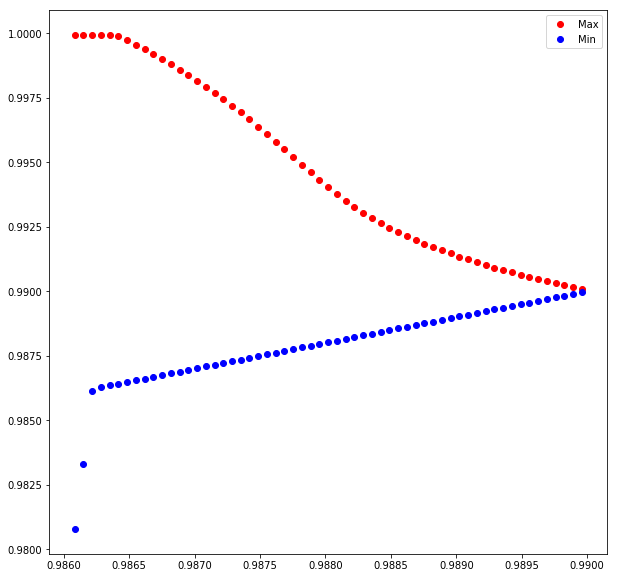

In [615]:
ShowLimDep(stp1,xl1,xr1)

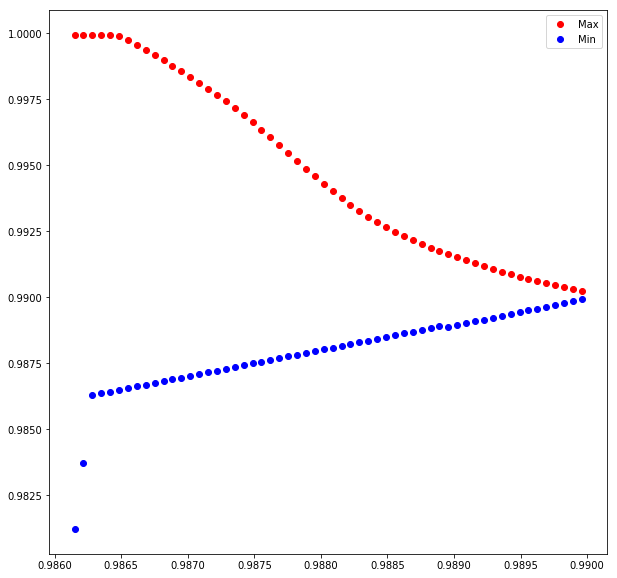

In [536]:
ShowLimDep(stp2,xl2,xr2)

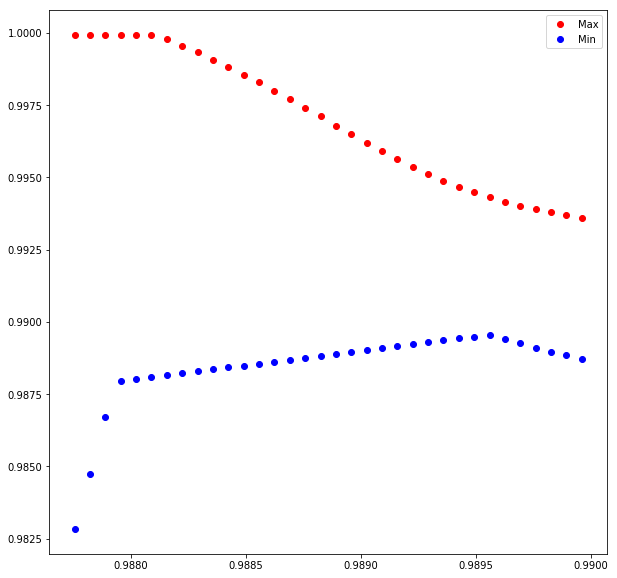

In [541]:
ShowLimDep(stp3,xl3,xr3)

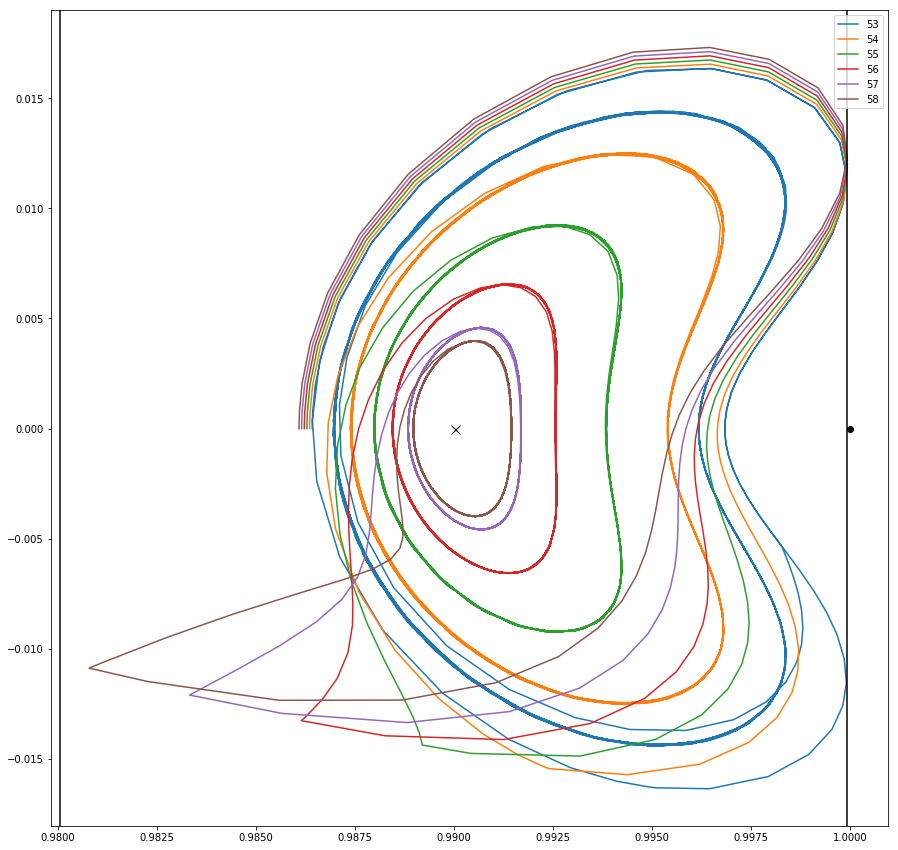

In [565]:
ShowTraj(arr1,[53,59],bound=[L1 -(earth[0]-L1),earth[0]-1e4/ER])

In [594]:
stp1[59]

array([0.98601598, 0.        ])

In [605]:
xl_ck1 = L1 -(earth[0]-L1)-1e6/ER
xr_ck1 = earth[0]-1e4/ER+1e6/ER
planes_ck1 = [xl_ck1,xr_ck1,1]
arr_ck1 = propNRevsPlanes(mu1,s0(*stp[59],v0kms),0,planes_ck1,20)

C:\Users\Alexander\Anaconda3\lib\site-packages\scipy\integrate\_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


In [606]:
arr_ck1

array([[ 9.86015981e-01,  0.00000000e+00,  0.00000000e+00, ...,
         2.85219841e-02,  0.00000000e+00,  0.00000000e+00],
       [ 9.86015981e-01,  9.76660164e-07,  0.00000000e+00, ...,
         2.85219840e-02,  0.00000000e+00,  3.42423642e-05],
       [ 9.86015984e-01,  1.07432610e-05,  0.00000000e+00, ...,
         2.85219775e-02,  0.00000000e+00,  3.76666006e-04],
       ...,
       [ 1.00122618e+00, -1.11624877e-02,  0.00000000e+00, ...,
        -1.22050924e-02,  0.00000000e+00,  6.58566437e+01],
       [ 1.00131252e+00, -1.20778612e-02,  0.00000000e+00, ...,
        -1.06308623e-02,  0.00000000e+00,  6.59368152e+01],
       [ 1.00130920e+00, -1.24540439e-02,  0.00000000e+00, ...,
        -9.90740185e-03,  0.00000000e+00,  6.59734457e+01]])

In [610]:
L

array([[ 0.99002668,  0.        ,  0.        ],
       [ 1.01003403,  0.        ,  0.        ],
       [-1.00000125,  0.        ,  0.        ],
       [ 0.499997  ,  0.8660254 ,  0.        ],
       [ 0.499997  , -0.8660254 ,  0.        ]])

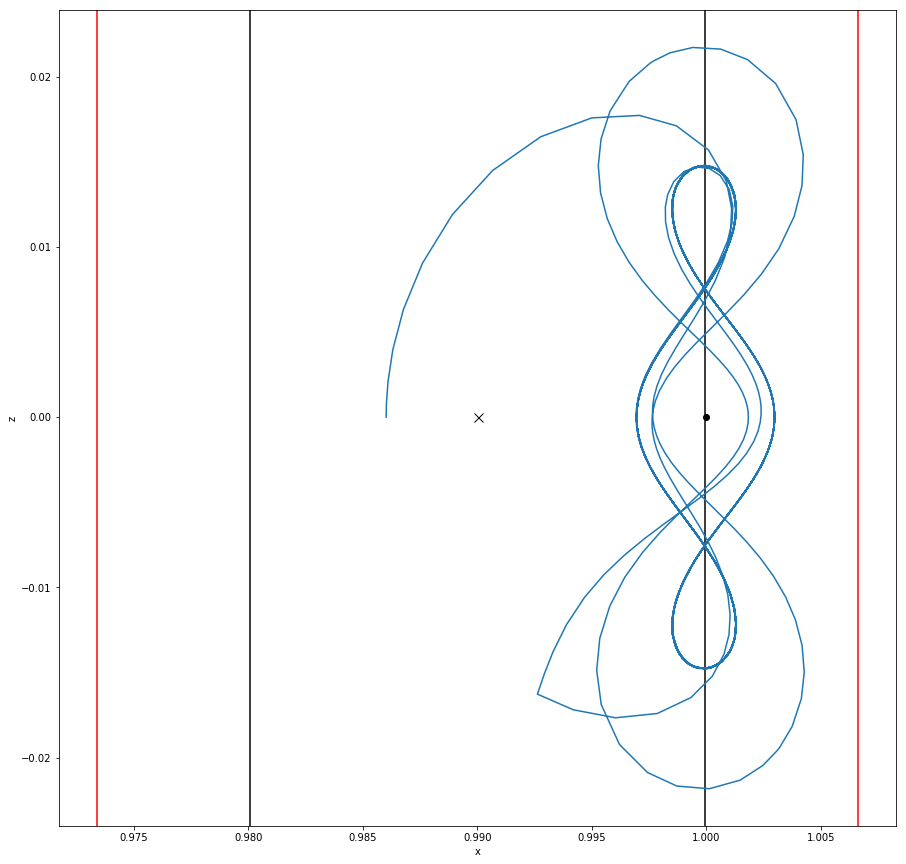

In [611]:
plt.figure(figsize=(15,15))
plt.plot(earth[0],earth[2],'ko')
#plt.plot(sun[0],sun[2],'r*')
plt.plot(L[0,0],L[0,2],'kx',markersize=9)
#plt.plot(xr_def,0,'r|',markersize=10)
#plt.plot(xl_def,0,'b|',markersize=10)
plt.axvline(xr_def,c='k')
plt.axvline(xl_def,c='k')

plt.axvline(xr_ck1,c='r')
plt.axvline(xl_ck1,c='r')

plt.plot(arr_ck1[:,0],arr_ck1[:,1])

plt.xlabel('x')
plt.ylabel('z');

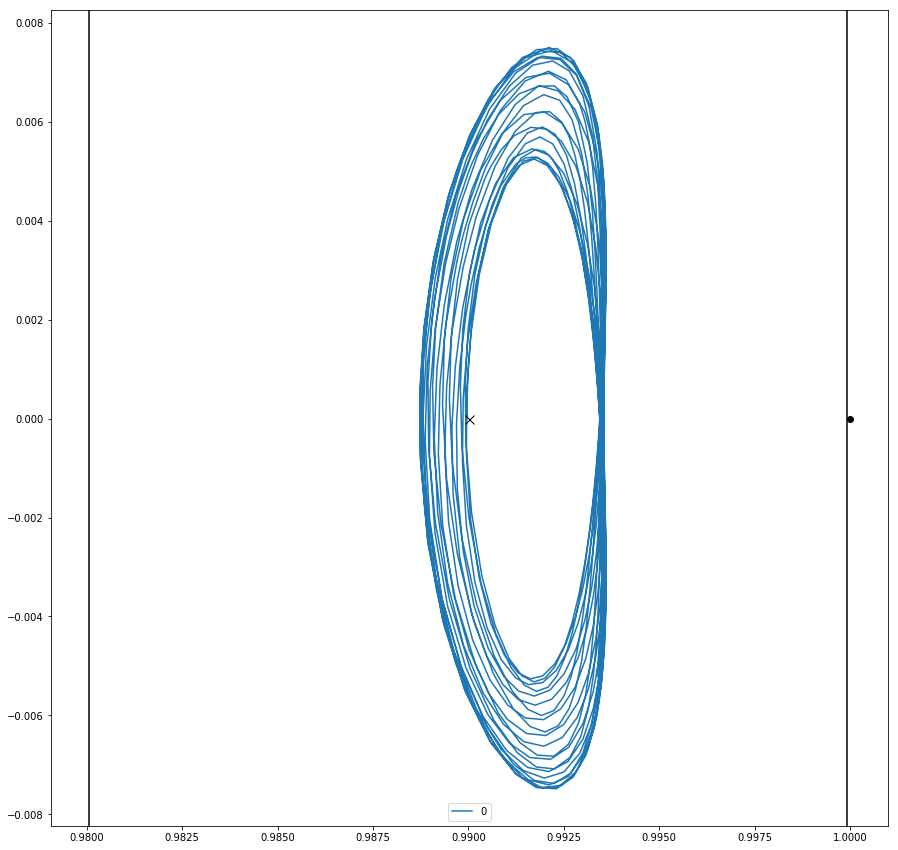

In [566]:
ShowTraj(arr3,[0,1],bound=[L1 -(earth[0]-L1),earth[0]-1e4/ER])

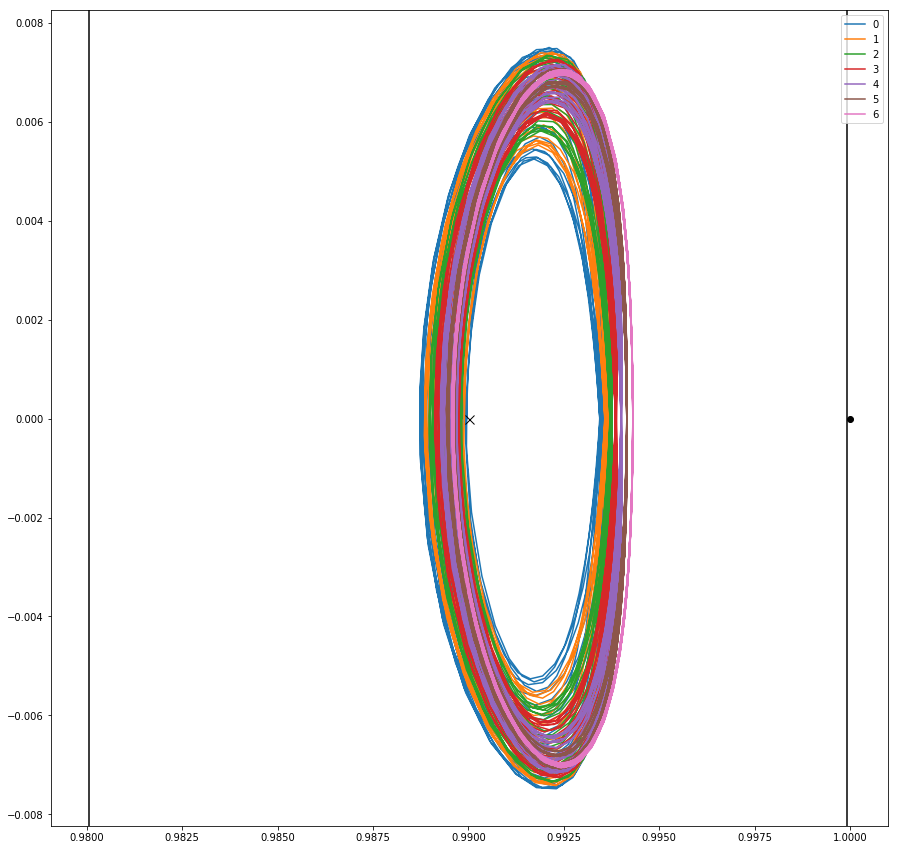

In [567]:
ShowTraj(arr3,[0,7],bound=[L1 -(earth[0]-L1),earth[0]-1e4/ER])

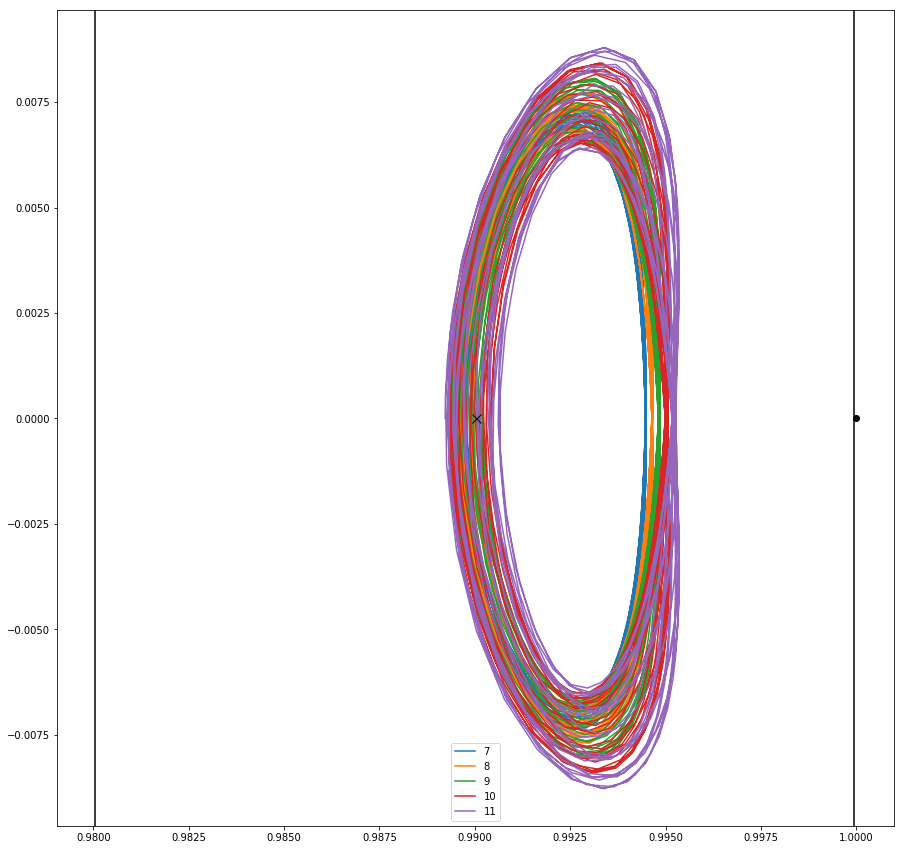

In [569]:
ShowTraj(arr3,[7,12],bound=[L1 -(earth[0]-L1),earth[0]-1e4/ER])